In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import random

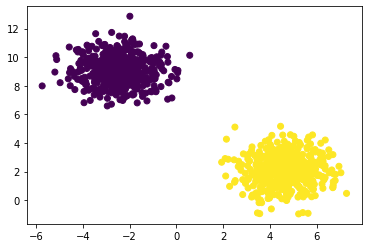

In [9]:
X,y = make_blobs(n_samples=1000,centers=2,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)

In [48]:
class Cluster:

    def __init__(self,name,center):
        self.name = name
        self.points = []
        self.centers = center

    def distance(self,point):
        return np.sqrt(np.sum((self.centers-point)**2))

    def relocate(self):
        self.centers = np.mean(self.points,axis=0)
        self.points = []

In [49]:
class KMeansClassifier:
    def __init__(self,n_centers,n_init=10,max_iters=100):
        self.n_centers = n_centers
        self.n_init = n_init
        self.max_iters = max_iters

    def fit(self,X):
        clusters = []
        for i in range(self.n_centers):
            cluster = Cluster(i,random.choice(X))
            clusters.append(cluster)


        for i in range(self.max_iters):
            label = []

            for point in X:
                distances = []

                for cluster in clusters:
                    distance = cluster.distance(point)
                    distances.append(distance)

                selected = clusters[np.argmin(distances)]
                label.append(selected.name)
                selected.points.append(point)

            for cluster in clusters:
                cluster.relocate()

        self.labels_ = label
        self.cluster_centers = np.array([cluster.centers for cluster in clusters])

In [54]:
model = KMeansClassifier(n_centers=4)

In [59]:
model.fit(X)


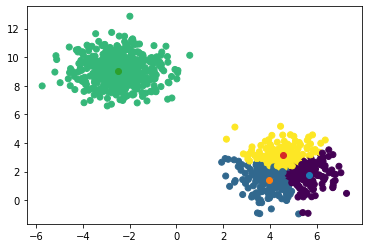

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers:
    plt.scatter(center[0],center[1])